In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.dropna(axis=0)
df.shape

(50000, 8)

In [ ]:
print(df.isnull().sum())

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64


In [ ]:
df.describe(include="all")

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,NaN,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,NaN,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,NaN,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,NaN,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,NaN,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [ ]:
df["amount"].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

TARGET

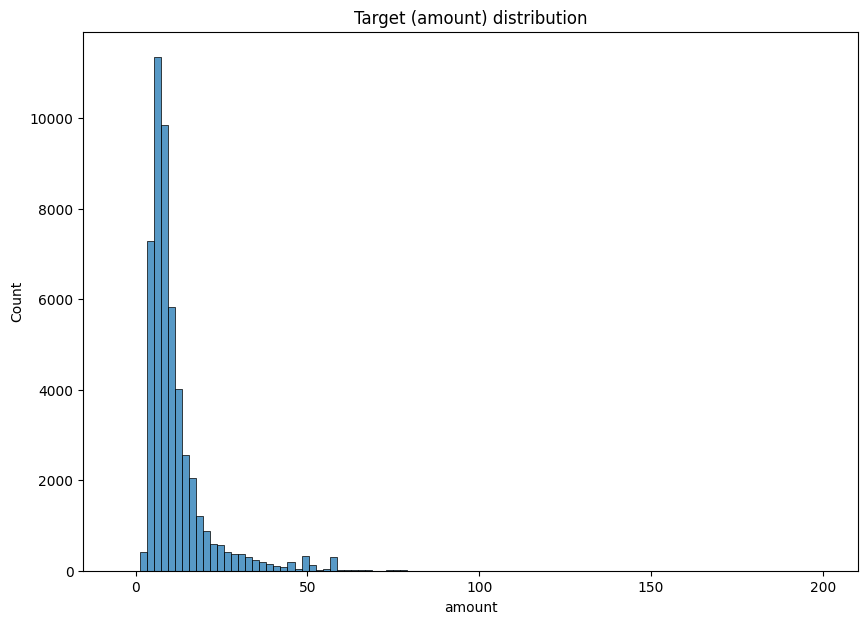

In [ ]:

plt.figure(figsize=(10, 7))

sns.histplot(data=df, x="amount", bins=100)

plt.title("Target (amount) distribution")

plt.show()

In [ ]:
df.drop(df[(df["amount"] <= 0) | (df["amount"] > 100)].index, inplace=True)
df.shape

(49975, 8)

In [ ]:
class BBox:
    def __init__(self, *coords):
        self.lat_min = coords[0]
        self.lat_max = coords[1]
        self.lon_min = coords[2]
        self.lon_max = coords[3]
        
    def unpack(self):
        return [self.lon_min, self.lon_max, self.lat_min, self.lat_max]
    
bbox = BBox(40.5, 41.8, -74.5, -72.8)

In [ ]:
def select_in_bbox(data, bbox):
    return (data["latitude_of_pickup"] >= bbox.lat_min) & (data["latitude_of_pickup"] <= bbox.lat_max) & \
           (data["longitude_of_pickup"] >= bbox.lon_min) & (data["longitude_of_pickup"] <= bbox.lon_max) & \
           (data["latitude_of_dropoff"] >= bbox.lat_min) & (data["latitude_of_dropoff"] <= bbox.lat_max) & \
           (data["longitude_of_dropoff"] >= bbox.lon_min) & (data["longitude_of_dropoff"] <= bbox.lon_max)

In [ ]:
df = df[select_in_bbox(df, bbox)]
df.shape

(48920, 8)

In [ ]:
def plot_on_map(data, bbox, nyc_map, s=1, alpha=0.3):
    features = ["pickup_", "dropoff_"]
    
    fig = plt.figure(figsize=(20, 10))
    
    for i, feature in enumerate(features):
        lat = getattr(data, feature+"latitude")
        lon = getattr(data, feature+"longitude")
        
        ax = fig.add_subplot(1, len(features), i + 1)
        ax.scatter(lon, lat, zorder=1, alpha=alpha, c='r', s=s)
        ax.set_xlim((bbox.lon_min, bbox.lon_max))
        ax.set_ylim((bbox.lat_min, bbox.lat_max))
        ax.set_title(f"{feature[:-1]} locations")
        ax.imshow(nyc_map, zorder=0, extent=bbox.unpack())

In [ ]:
def calc_distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295  # pi / 180
    a = 0.5 - np.cos((lat2 - lat1) * p) / 2 + \
        np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
n_lon, n_lat = 200, 200
density_array = [np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon))]

bins_lat = np.zeros(n_lat + 1)
bins_lon = np.zeros(n_lon + 1)
delta_lat = (bbox.lat_max - bbox.lat_min) / n_lat                                               
delta_lon = (bbox.lon_max - bbox.lon_min) / n_lon
                                               
bin_width_miles = calc_distance(bbox.lat_min, bbox.lon_max, bbox.lat_min, bbox.lon_min) / n_lon
bin_height_miles = calc_distance(bbox.lat_max, bbox.lon_min, bbox.lat_min, bbox.lon_min) / n_lat

for j in range(n_lat + 1):
    bins_lat[j] = bbox.lat_min + j * delta_lat
for i in range(n_lon + 1):
    bins_lon[i] = bbox.lon_min + i * delta_lon

In [ ]:
idx_pickup_lat = np.digitize(df["latitude_of_pickup"], bins_lat)
idx_pickup_lon = np.digitize(df["longitude_of_pickup"], bins_lon)

idx_dropoff_lat = np.digitize(df["latitude_of_dropoff"], bins_lat)
idx_dropoff_lon = np.digitize(df["longitude_of_dropoff"], bins_lon)

In [ ]:
dxdy = bin_width_miles * bin_height_miles

for i in range(n_lon):
    for j in range(n_lat):
        density_array[0][j, i] = np.sum(
            (idx_pickup_lon == i + 1) & (idx_pickup_lat == (n_lat - j))
        ) / dxdy
        density_array[1][j, i] = np.sum(
            (idx_dropoff_lon == i + 1) & (idx_dropoff_lat == (n_lat - j))
        ) / dxdy

In [ ]:
df["distance"] = calc_distance(
    df["latitude_of_pickup"], df["longitude_of_pickup"],
    df["latitude_of_dropoff"], df["longitude_of_dropoff"]
)

In [ ]:
df["distance"].describe()

count    48920.000000
mean         2.083866
std          2.426977
min          0.000000
25%          0.785113
50%          1.341649
75%          2.446838
max         64.644331
Name: distance, dtype: float64

In [ ]:
df.drop(df[df["distance"] < 0.05].index, inplace=True)
df.shape

(48130, 9)

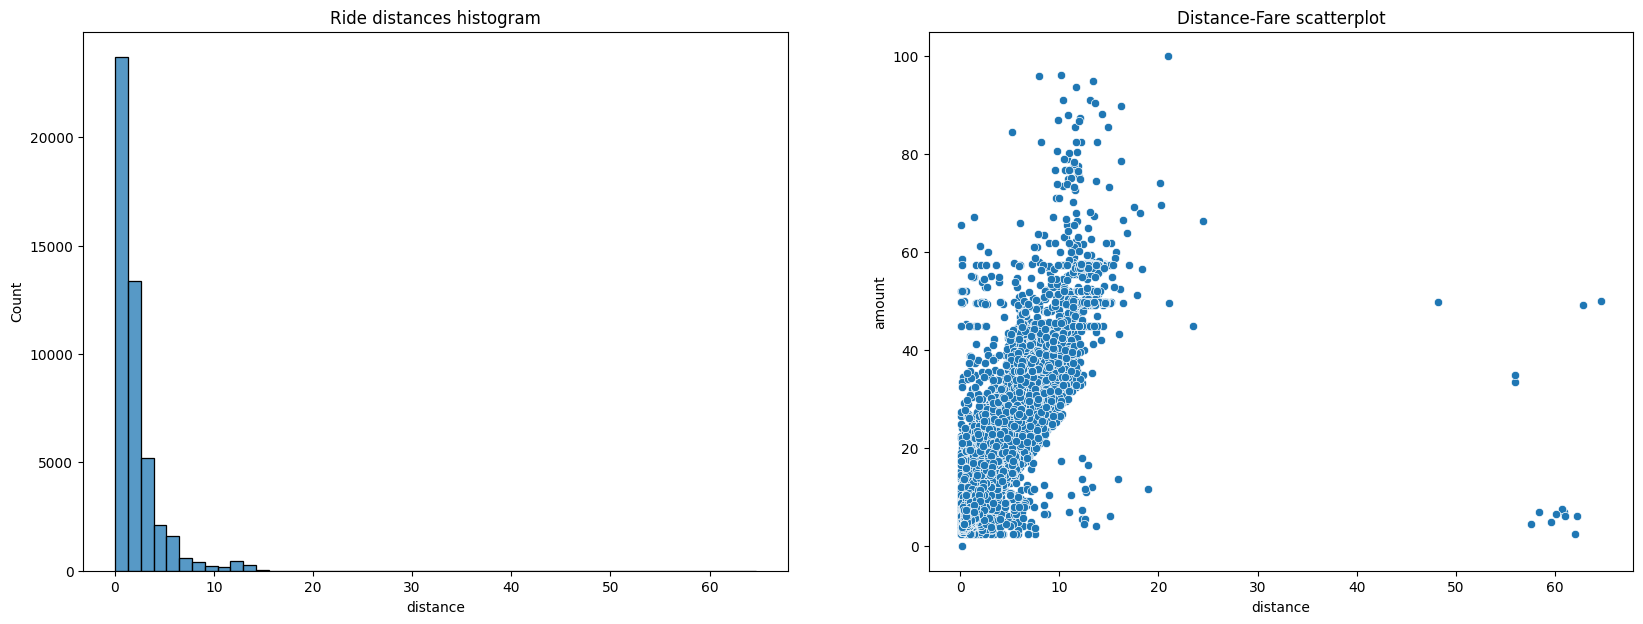

In [ ]:
# Visualize ride distances

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=df, x="distance", bins=50, ax=axs[0])
axs[0].set_title("Ride distances histogram")

sns.scatterplot(data=df, x="distance", y="amount", alpha=1, ax=axs[1])
axs[1].set_title("Distance-Fare scatterplot")

plt.show()

In [ ]:
df.groupby("no_of_passenger")[["distance", "amount"]].mean()

,distance,amount
no_of_passenger,,
0,1.948076,9.533544
1,2.087070,11.136328
2,2.250691,11.945084
3,2.075775,11.258960
4,2.092186,11.335863
5,2.153547,11.304221
6,2.231079,12.510783


In [ ]:
df[df["no_of_passenger"] == 0].shape[0]

158

In [ ]:
df.drop(df[df["no_of_passenger"] == 0].index, inplace=True)
df.shape

(47972, 9)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
distance                float64
dtype: object

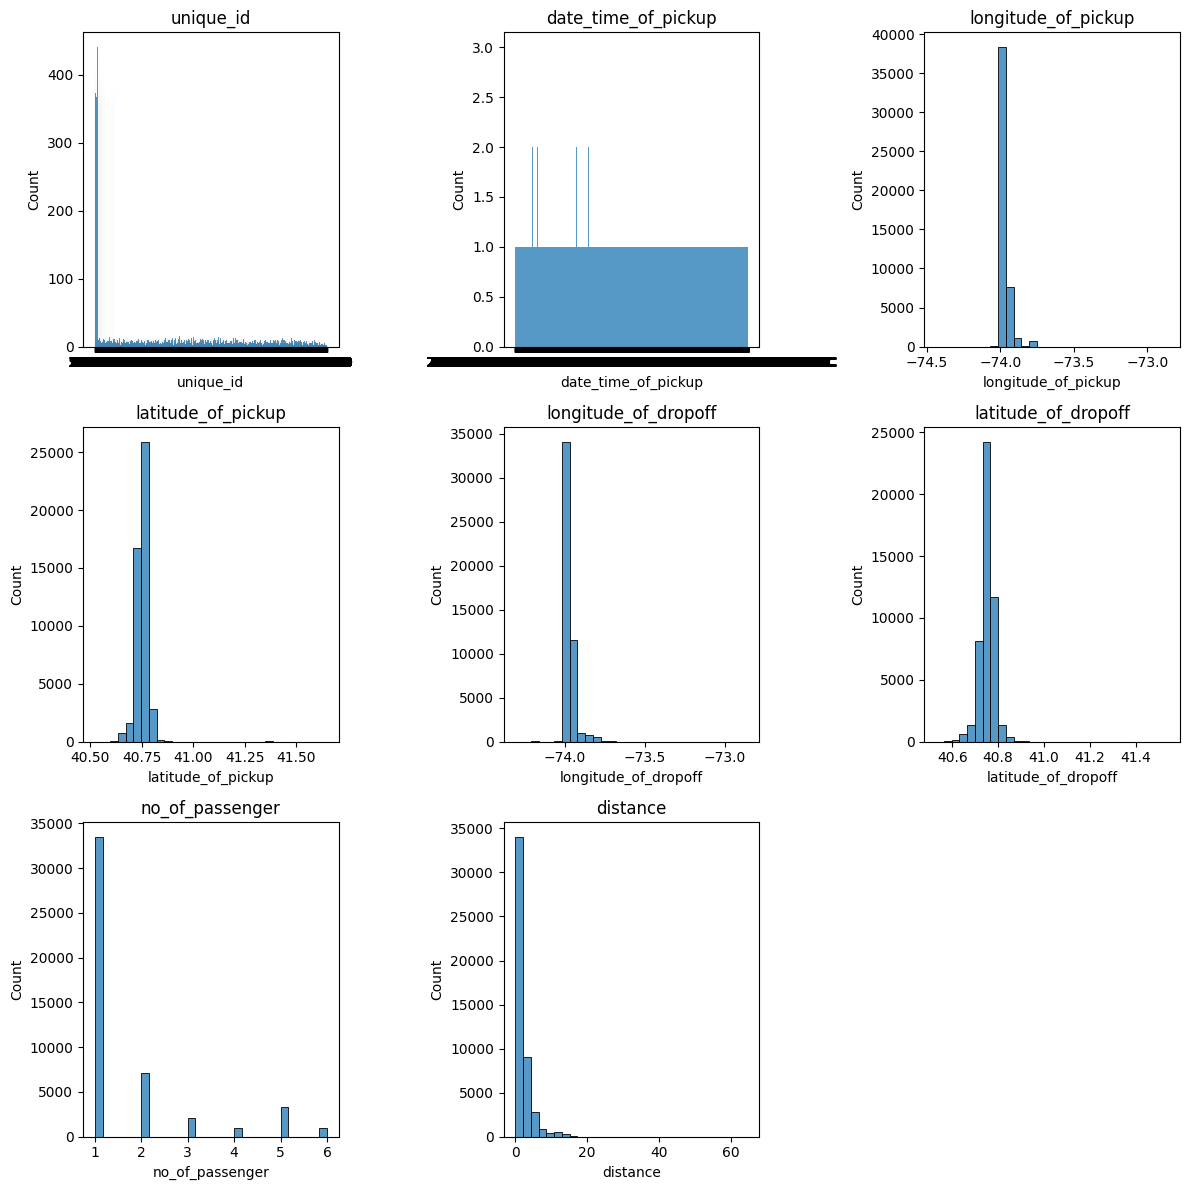

In [ ]:
fig = plt.figure(figsize=(12, 12))

for i, feature in enumerate(df.columns.to_list()):
    plt.subplot(3, 3, i + 1)

    sns.histplot(data=df, x=feature, bins=30)

    plt.title(feature)

fig.tight_layout()
plt.show()